In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### 1

### 2

In [2]:
files = glob.glob('states*.csv')
data_list = [pd.read_csv(file, index_col='Unnamed: 0') for file in files]
us_census = pd.concat(data_list)

In [3]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


### 3

In [4]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

No, these types will not help us to make histograms.

#### 4

In [6]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


This is due to % sign at the end of the values.

#### 5

In [7]:
us_census['Income'] = us_census['Income'].replace({'\$':''}, regex = True)

In [8]:
us_census['Income'] = pd.to_numeric(us_census['Income'])

In [9]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object

#### 6

In [10]:
split_columns = us_census.GenderPop.str.split('_')

In [11]:
us_census['Men'] = split_columns.str.get(0)
us_census['Women'] = split_columns.str.get(1)

In [12]:
us_census.drop(['GenderPop'],axis = 1,inplace=True)

In [13]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M,19334329F


#### 7

In [14]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Men          object
Women        object
dtype: object

In [15]:
us_census['Men'] = pd.to_numeric(us_census.Men.str[:-1])
us_census['Women'] = pd.to_numeric(us_census.Women.str[:-1])

In [16]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Men           int64
Women       float64
dtype: object

#### 8

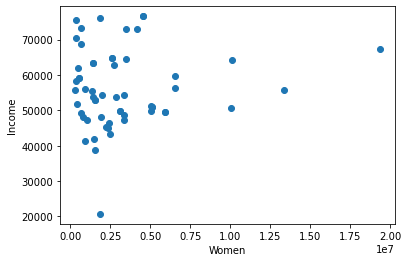

In [17]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

### 9

In [18]:
us_census.groupby(['State']).count()['Women']

State
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                2
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 2
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    2
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                0
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                2
Montana                 0
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              2
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    2
Oklahoma                1
Oregon                  1
Pennsy

In [19]:
us_census = us_census.fillna(value={
'Women': us_census.TotalPop - us_census.Men
})

In [20]:
us_census.groupby(['State']).count()['Women']

State
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                2
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 2
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    2
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                2
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                2
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              2
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    2
Oklahoma                1
Oregon                  1
Pennsy

### 10

In [21]:
duplicates = us_census.duplicated()
print(duplicates.value_counts())


False    51
True      9
dtype: int64


### 11

In [22]:
us_census = us_census.drop_duplicates()

### 12

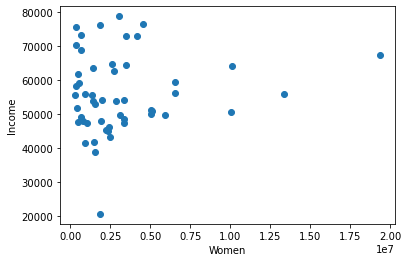

In [23]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

#### 13

In [24]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

#### 14

In [25]:
us_census['Hispanic'] = us_census.Hispanic.str[:-1]
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic)
us_census['White'] = us_census.White.str[:-1]
us_census['White'] = pd.to_numeric(us_census.White)
us_census['Black'] = us_census.Black.str[:-1]
us_census['Black'] = pd.to_numeric(us_census.Black)
us_census['Native'] = us_census.Native.str[:-1]
us_census['Native'] = pd.to_numeric(us_census.Native)
us_census['Asian'] = us_census.Asian.str[:-1]
us_census['Asian'] = pd.to_numeric(us_census.Asian)
us_census['Pacific'] = us_census.Pacific.str[:-1]
us_census['Pacific'] = pd.to_numeric(us_census.Pacific)

In [26]:
### filling null if any with mean values
us_census = us_census.fillna(value={
'Hispanic': us_census.Hispanic.mean(),
'White': us_census.White.mean(),
'Black': us_census.Black.mean(),
'Native': us_census.Native.mean(),
'Asian': us_census.Asian.mean(),
'Pacific': us_census.Pacific.mean(),
})

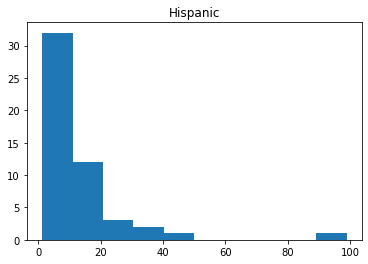

In [28]:
plt.hist(us_census['Hispanic'])
plt.title('Hispanic')
plt.show()

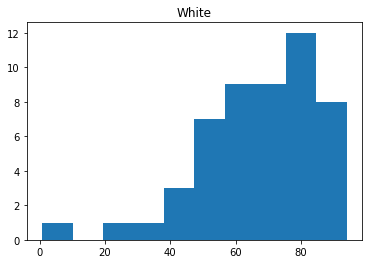

In [29]:
plt.hist(us_census['White'])
plt.title('White')
plt.show()

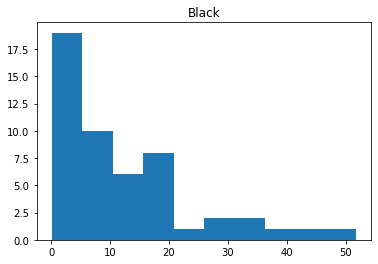

In [30]:
plt.hist(us_census['Black'])
plt.title('Black')
plt.show()

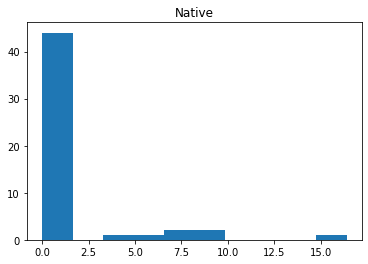

In [31]:
plt.hist(us_census['Native'])
plt.title('Native')
plt.show()

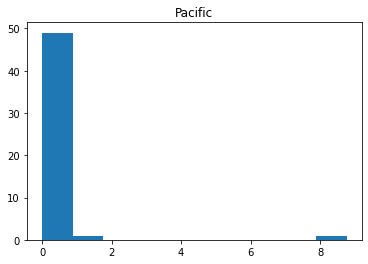

In [32]:
plt.hist(us_census['Pacific'])
plt.title('Pacific')
plt.show()

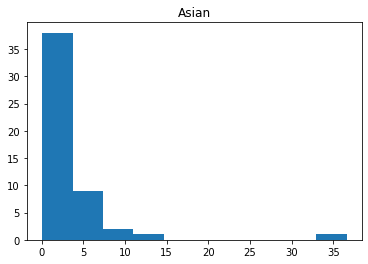

In [33]:
plt.hist(us_census['Asian'])
plt.title('Asian')
plt.show()

### 15

# PART 2

### 1

In [34]:
inventory = pd.read_csv('inventory.csv')

### 2

In [36]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 3

In [37]:
staten_island = inventory.head(10)

### 4

In [38]:
product_request = staten_island.product_description

### 5

In [39]:
seed_request = inventory[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]

### 6

In [41]:
in_stock = lambda x: True if x > 0 else False

In [42]:
inventory['in_stock'] = inventory.quantity.apply(in_stock)

### 7

In [44]:
total_value = lambda row: row.price * row.quantity

In [45]:
inventory['total_value'] = inventory.apply(total_value, axis = 1)

### 8

In [47]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

### 9

In [49]:
inventory['full_description'] = inventory.apply(combine_lambda, axis = 1)

In [50]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
